In [2]:
%env OMP_NUM_THREADS = 4

import datetime
print(datetime.datetime.now())
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, f1_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

env: OMP_NUM_THREADS=4
2021-10-12 06:44:36.449727


In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels as sm
import pmdarima as pm

In [4]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/luoqi/OneDrive/Queens University/Jobs/Applications/EY consulting/Data")


# Combine dataset

In [5]:
extension = 'csv'

file2019 = [i for i in glob.glob('2019*'.format(extension))]
file2020 = [i for i in glob.glob('2020*'.format(extension))]
file2021 = [i for i in glob.glob('2021*'.format(extension))]

In [6]:
#combine all files in the list

df_2019 = pd.concat([pd.read_csv(f) for f in file2019 ])
df_2020 = pd.concat([pd.read_csv(f) for f in file2020 ])
df_2021 = pd.concat([pd.read_csv(f) for f in file2021 ])

In [7]:
df = pd.concat([df_2019,df_2020,df_2021])

In [8]:
df.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member
3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member


# Data Cleaning

In [9]:
df.count()
df.isna().sum() #Get an idea of how many NA's we're dealing with

Trip Id               8170082
Trip  Duration        8170066
Start Station Id      8170082
Start Time            8170082
Start Station Name    8168271
End Station Id        8166761
End Time              8170082
End Station Name      8164989
Bike Id               8169806
User Type             8169833
dtype: int64

Trip Id                  0
Trip  Duration          16
Start Station Id         0
Start Time               0
Start Station Name    1811
End Station Id        3321
End Time                 0
End Station Name      5093
Bike Id                276
User Type              249
dtype: int64

In [10]:
null_data = df[df.isnull().any(axis=1)]

In [11]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 59771 to 454602
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip Id             7357 non-null   int64  
 1   Trip  Duration      7341 non-null   float64
 2   Start Station Id    7357 non-null   object 
 3   Start Time          7357 non-null   object 
 4   Start Station Name  5546 non-null   object 
 5   End Station Id      4036 non-null   object 
 6   End Time            7357 non-null   object 
 7   End Station Name    2264 non-null   object 
 8   Bike Id             7081 non-null   object 
 9   User Type           7108 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 632.2+ KB


In [12]:
null_data.to_csv( "null_data.csv") # export the instances containing missing values for further analysis in excel

In [13]:
df['Trip  Duration'].max() # the max outlier is about 143 days which is impossible for such a long trip

12403785.0

In [14]:
# Valid trip should be more than 1 min. TPA generally consider trips less than a minute to be false trips. 
df = df[df['Trip  Duration']>60]

# Exclude the outliners that duration more than 24 hours. 
df = df[df['Trip  Duration']<24*60*60]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8134425 entries, 0 to 454787
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Trip Id             int64  
 1   Trip  Duration      float64
 2   Start Station Id    object 
 3   Start Time          object 
 4   Start Station Name  object 
 5   End Station Id      object 
 6   End Time            object 
 7   End Station Name    object 
 8   Bike Id             object 
 9   User Type           object 
dtypes: float64(1), int64(1), object(8)
memory usage: 682.7+ MB


In [15]:
df.isna().sum() #Get an idea of how many NA's we're dealing with

Trip Id                  0
Trip  Duration           0
Start Station Id         0
Start Time               0
Start Station Name    1802
End Station Id         924
End Time                 0
End Station Name      2690
Bike Id                275
User Type              249
dtype: int64

In [16]:
df= df.drop(columns=['Start Station Name','End Station Name','Bike Id'])

In [17]:
df = df[df['End Station Id'].notna()]
df = df[df['User Type'].notna()]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133252 entries, 0 to 454787
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Trip Id           int64  
 1   Trip  Duration    float64
 2   Start Station Id  object 
 3   Start Time        object 
 4   End Station Id    object 
 5   End Time          object 
 6   User Type         object 
dtypes: float64(1), int64(1), object(5)
memory usage: 496.4+ MB


In [19]:
df.isna().sum() # test na

Trip Id             0
Trip  Duration      0
Start Station Id    0
Start Time          0
End Station Id      0
End Time            0
User Type           0
dtype: int64

In [20]:
# Transfer Datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'],format = '%m/%d/%Y %H:%M')
df['End Time'] = pd.to_datetime(df['End Time'],format = '%m/%d/%Y %H:%M')

In [21]:
df['Start date'] = df['Start Time'].dt.date
df['End date'] = df['End Time'].dt.date
df['Hour'] =df['Start Time'].dt.hour
df['day_of_week'] = df['Start Time'].dt.day_name()
df['Month'] =df['Start Time'].dt.month_name()
df['Quarter'] = df['Start Time'].dt.quarter

In [22]:
df.tail()

,Trip Id,Trip Duration,Start Station Id,Start Time,End Station Id,End Time,User Type,Start date,End date,Hour,day_of_week,Month,Quarter
454783,13916477,553.0,7274,2021-09-30 23:59:00,7382.0,2021-10-01 00:08:00,Annual Member,2021-09-30,2021-10-01,23,Thursday,September,3
454784,13916478,707.0,7204,2021-09-30 23:59:00,7020.0,2021-10-01 00:11:00,Annual Member,2021-09-30,2021-10-01,23,Thursday,September,3
454785,13916479,1347.0,7372,2021-09-30 23:59:00,7273.0,2021-10-01 00:22:00,Casual Member,2021-09-30,2021-10-01,23,Thursday,September,3
454786,13916480,899.0,7002,2021-09-30 23:59:00,7463.0,2021-10-01 00:14:00,Annual Member,2021-09-30,2021-10-01,23,Thursday,September,3
454787,13916481,203.0,7026,2021-09-30 23:59:00,7044.0,2021-10-01 00:03:00,Annual Member,2021-09-30,2021-10-01,23,Thursday,September,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133252 entries, 0 to 454787
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Trip Id           int64         
 1   Trip  Duration    float64       
 2   Start Station Id  object        
 3   Start Time        datetime64[ns]
 4   End Station Id    object        
 5   End Time          datetime64[ns]
 6   User Type         object        
 7   Start date        object        
 8   End date          object        
 9   Hour              int64         
 10  day_of_week       object        
 11  Month             object        
 12  Quarter           int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 868.7+ MB


In [24]:
df.isna().sum() 

Trip Id             0
Trip  Duration      0
Start Station Id    0
Start Time          0
End Station Id      0
End Time            0
User Type           0
Start date          0
End date            0
Hour                0
day_of_week         0
Month               0
Quarter             0
dtype: int64


# Group the Data for modeling and analysis


In [25]:
use = df.groupby(['Start date', 'Hour','day_of_week', 'User Type'])['Trip Id'].count()
use.to_csv( "Tripamount.csv")

In [26]:
duration = df.groupby(['Start date','day_of_week', 'User Type'])['Trip  Duration'].sum()
duration.to_csv( "duration.csv")

<AxesSubplot:xlabel='Hour', ylabel='Trip Id'>

Text(0, 0.5, 'Average number of Trips per hour')

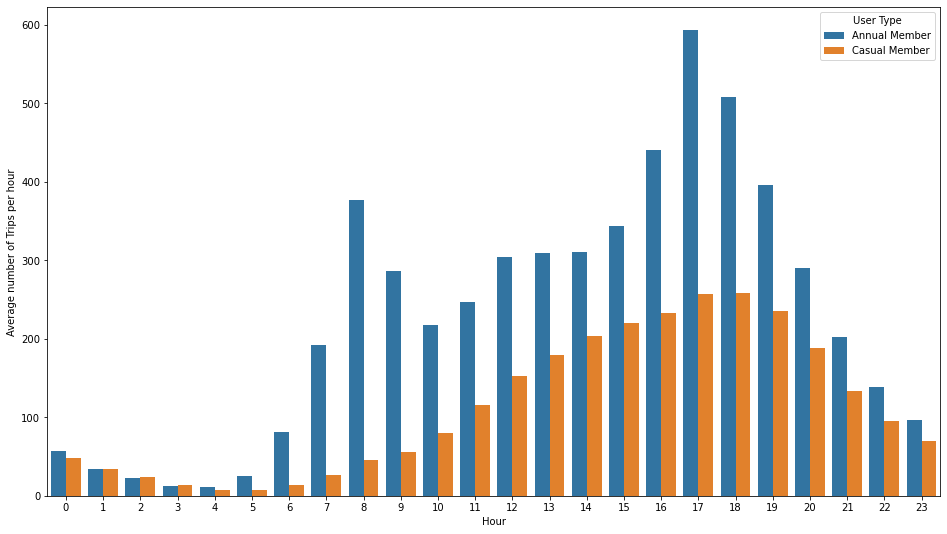

In [27]:
data = df.groupby(['Start date', 'Hour', 'User Type'])['Trip Id'].nunique().groupby(['Hour', 'User Type']).mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 9))

sns.barplot(x='Hour', y='Trip Id', hue='User Type', data=data, ax=ax)
ax.set_ylabel('Average number of Trips per hour')

<AxesSubplot:xlabel='Hour', ylabel='Trip Id'>

Text(0, 0.5, 'Average number of Trips per hour')

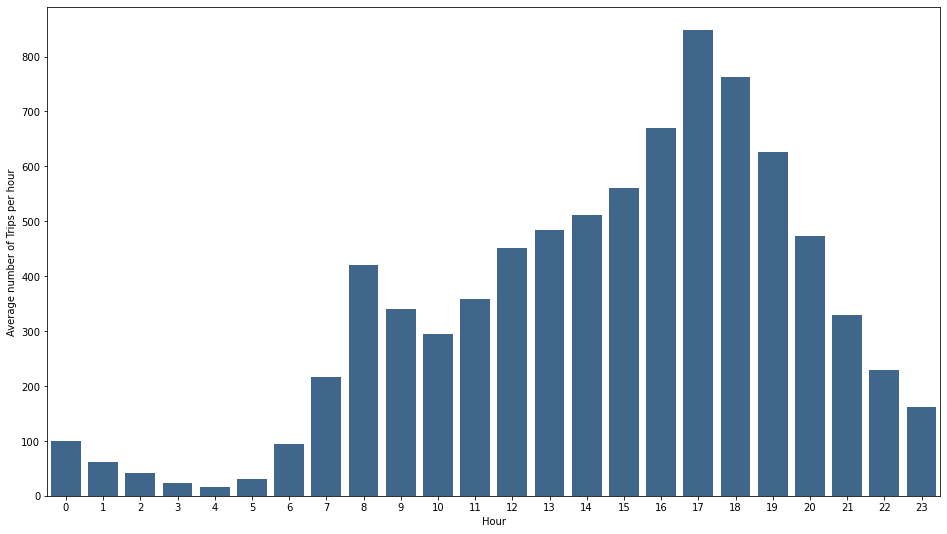

In [28]:
data = df.groupby(['Start date', 'Hour'])['Trip Id'].nunique().groupby(['Hour']).mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 9))

sns.barplot(x='Hour', y='Trip Id', data=data, ax=ax,color=(0.2, 0.4, 0.6, 0.6))
ax.set_ylabel('Average number of Trips per hour')

In [30]:
# Station information Dataset

from datetime import timedelta


import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

import json
import os


r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']]


In [31]:
print(bikeshare_stations)

    station_id                                     name        lat        lon
0         7000             Fort York  Blvd / Capreol Ct  43.639832 -79.395954
1         7001                Wellesley Station Green P  43.664964 -79.383550
2         7002               St. George St / Bloor St W  43.667333 -79.399429
3         7003                 Madison Ave / Bloor St W  43.667158 -79.402761
4         7004                  University Ave / Elm St  43.656518 -79.389099
..         ...                                      ...        ...        ...
604       7677                    1303 Yonge St - SMART  43.684618 -79.392459
605       7678  York University Station (South) - SMART  43.773450 -79.500200
606       7679          York University Station (North)  43.774100 -79.500500
607       7680                Princes Gate / Nunavut Dr  43.633464 -79.414306
608       7681                             25 Booth Ave  43.654484 -79.341057

[609 rows x 4 columns]


In [32]:
# Use for bike demand modeling & Analysis
bikedemand = df.groupby(['Start date','day_of_week','Month','Start Station Id'])['Trip Id'].count()
bikedemand.to_csv( "bike_demand_timeseries.csv")


# Use for dock demand (bike return) modeling & Analysis
dockdemand = df.groupby(['End date','day_of_week','Month','End Station Id'])['Trip Id'].count()
dockdemand.to_csv( "dock_demand_timeseries.csv")